In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
training_data = pd.read_csv('train.csv')

### EDA

In [31]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rent_approval_date   60000 non-null  object 
 1   town                 60000 non-null  object 
 2   block                60000 non-null  object 
 3   street_name          60000 non-null  object 
 4   flat_type            60000 non-null  object 
 5   flat_model           60000 non-null  object 
 6   floor_area_sqm       60000 non-null  float64
 7   furnished            60000 non-null  object 
 8   lease_commence_date  60000 non-null  int64  
 9   latitude             60000 non-null  float64
 10  longitude            60000 non-null  float64
 11  elevation            60000 non-null  int64  
 12  subzone              60000 non-null  object 
 13  planning_area        60000 non-null  object 
 14  region               60000 non-null  object 
 15  monthly_rent         60000 non-null 

In [32]:
training_data.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0,yuhua east,jurong east,west region,1600
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0,bedok north,bedok,east region,2250
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0,toa payoh central,toa payoh,central region,1900
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0,pasir ris drive,pasir ris,east region,2850
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0,bendemeer,kallang,central region,2100


In [33]:
train_dateindex = training_data

In [34]:
train_dateindex['rent_approval_date'] = pd.to_datetime(train_dateindex['rent_approval_date'], format='%Y-%m')
train_dateindex['lease_commence_date'] = pd.to_datetime(train_dateindex['lease_commence_date'], format='%Y')

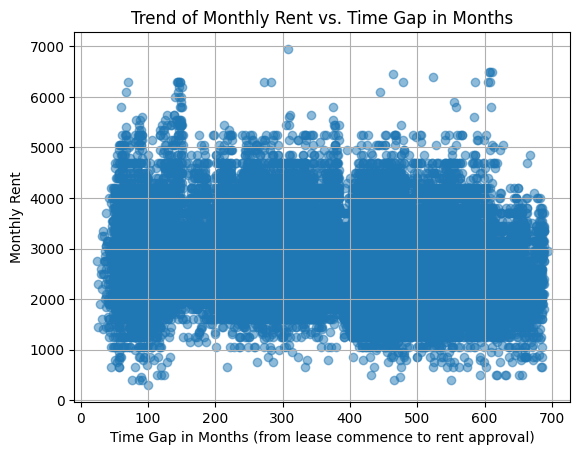

In [35]:
train_dateindex['lease_to_approval'] = train_dateindex['rent_approval_date'] - train_dateindex['lease_commence_date']
train_dateindex['time_gap_months'] = train_dateindex['lease_to_approval'].dt.days/30
plt.scatter(train_dateindex['time_gap_months'], train_dateindex['monthly_rent'], alpha=0.5)
plt.title('Trend of Monthly Rent vs. Time Gap in Months')
plt.xlabel('Time Gap in Months (from lease commence to rent approval)')
plt.ylabel('Monthly Rent')
plt.grid(True)
plt.show()

In [36]:
train_dateindex.set_index('rent_approval_date', inplace=True)

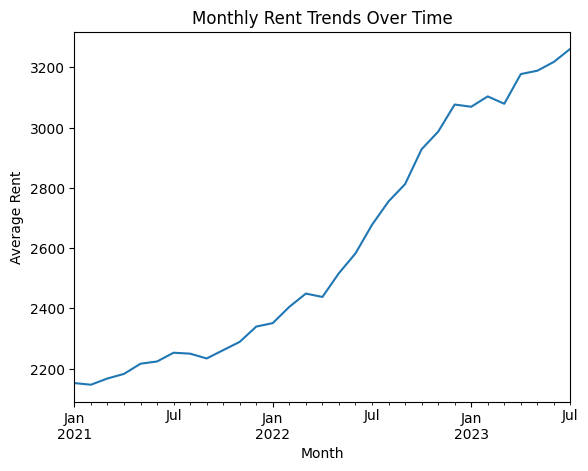

In [37]:
monthly_trends = train_dateindex['monthly_rent'].resample('M').mean()
monthly_trends.plot()
plt.title('Monthly Rent Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Average Rent')
plt.show()

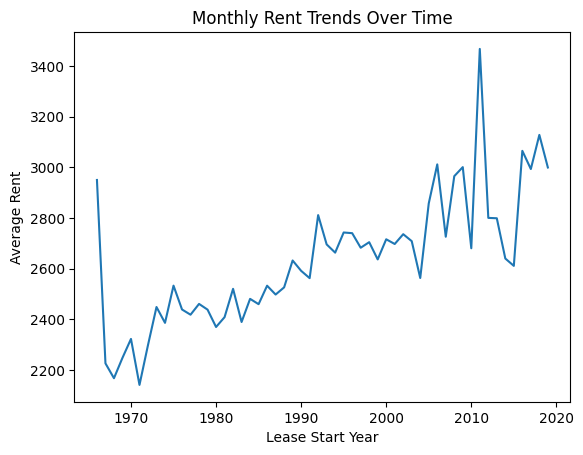

In [38]:
train_dateindex['lease_year'] = train_dateindex['lease_commence_date'].dt.year
annual_lease_trends = train_dateindex.groupby('lease_year')['monthly_rent'].mean()
annual_lease_trends.plot()
plt.title('Monthly Rent Trends Over Time')
plt.xlabel('Lease Start Year')
plt.ylabel('Average Rent')
plt.show()

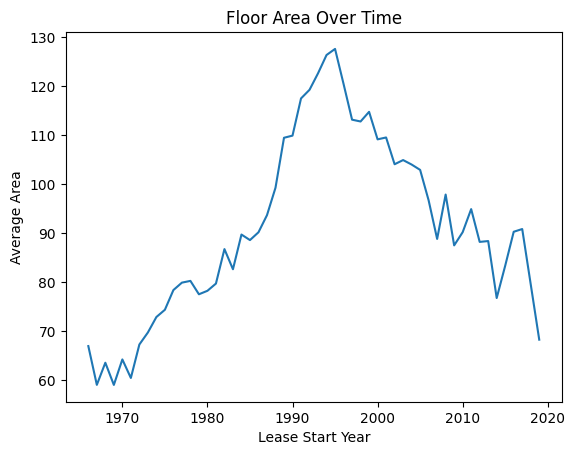

In [39]:
train_dateindex['lease_year'] = train_dateindex['lease_commence_date'].dt.year
annual_lease_trends = train_dateindex.groupby('lease_year')['floor_area_sqm'].mean()
annual_lease_trends.plot()
plt.title('Floor Area Over Time')
plt.xlabel('Lease Start Year')
plt.ylabel('Average Area')
plt.show()

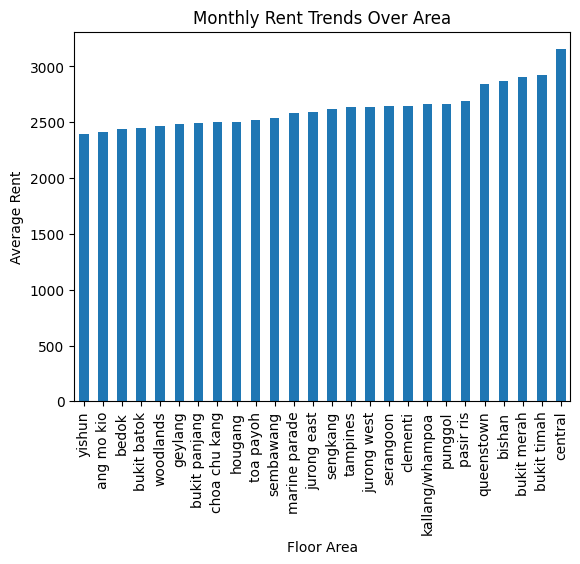

In [40]:
annual_lease_trends = train_dateindex.groupby('town')['monthly_rent'].mean().sort_values()
annual_lease_trends.plot(kind="bar")
plt.title('Monthly Rent Trends Over Area')
plt.xlabel('Floor Area')
plt.ylabel('Average Rent')
plt.show()

In [41]:
col_names_df = pd.DataFrame(training_data.columns, columns=['Column_Name'])
values_df = training_data.head(1).reset_index(drop=True).T.reset_index(drop=True)
sample_snippet = pd.concat([col_names_df, values_df], axis=1)
sample_snippet.columns = ["Features", "Values"]
sample_snippet

,Features,Values
0,town,jurong east
1,block,257
2,street_name,Jurong East Street 24
3,flat_type,3 room
4,flat_model,new generation
5,floor_area_sqm,67.0
6,furnished,yes
7,lease_commence_date,1983-01-01 00:00:00
8,latitude,1.344518
9,longitude,103.73863


In [42]:
training_data.shape

(60000, 18)

<Axes: xlabel='latitude', ylabel='longitude'>

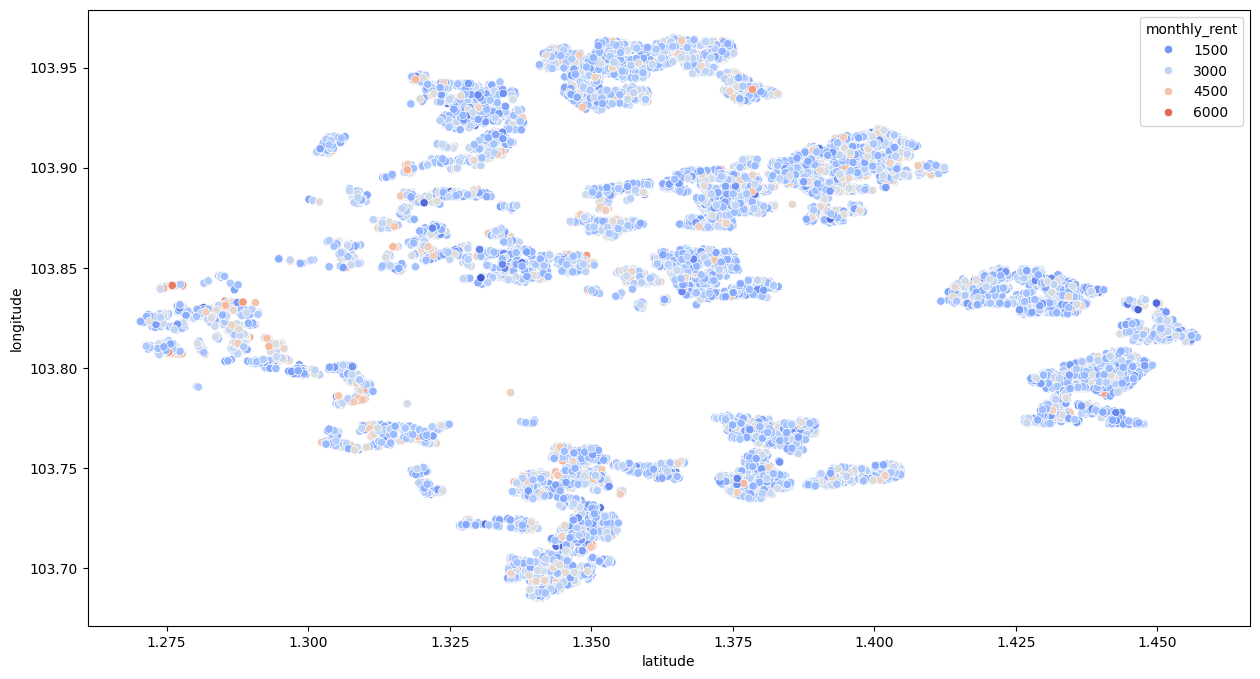

In [43]:
plt.figure(figsize = (15, 8))
sns.scatterplot(x = "latitude", y = "longitude", data = training_data, hue = "monthly_rent", palette = "coolwarm")

### Checking for NULL Values

In [44]:
training_data.isnull().sum()

town                   0
block                  0
street_name            0
flat_type              0
flat_model             0
floor_area_sqm         0
furnished              0
lease_commence_date    0
latitude               0
longitude              0
elevation              0
subzone                0
planning_area          0
region                 0
monthly_rent           0
lease_to_approval      0
time_gap_months        0
lease_year             0
dtype: int64

### Check for duplicates

In [45]:
training_data[training_data.duplicated()]

,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent,lease_to_approval,time_gap_months,lease_year
rent_approval_date,,,,,,,,,,,,,,,,,,
2021-01-01,tampines,157,Tampines Street 12,3 room,new generation,82.0,yes,1985-01-01,1.351073,103.945004,0,tampines east,tampines,east region,1850,13149 days,438.300000,1985
2021-11-01,ang mo kio,602,ang mo kio avenue 5,3 room,new generation,67.0,yes,1980-01-01,1.380709,103.835368,0,yio chu kang west,ang mo kio,north-east region,1700,15280 days,509.333333,1980
2023-07-01,queenstown,14,Ghim Moh Road,5-room,standard,114.0,yes,1977-01-01,1.308847,103.789147,0,ghim moh,queenstown,central region,5250,16982 days,566.066667,1977
2021-05-01,clementi,374,Clementi Avenue 4,3 room,new generation,82.0,yes,1981-01-01,1.319126,103.766984,0,clementi north,clementi,west region,2100,14730 days,491.000000,1981
2021-03-01,bishan,195,bishan street 13,3 room,simplified,64.0,yes,1988-01-01,1.348362,103.850897,0,bishan east,bishan,central region,1950,12113 days,403.766667,1988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,ang mo kio,317,ang mo kio street 31,5-room,improved,127.0,yes,1994-01-01,1.365625,103.847011,0,townsville,ang mo kio,north-east region,3450,10439 days,347.966667,1994
2022-08-01,central,668,Chander Road,3-room,model a,75.0,yes,1984-01-01,1.307581,103.851478,0,farrer park,rochor,central region,3150,14092 days,469.733333,1984
2021-05-01,sengkang,319a,anchorvale drive,5 room,improved,110.0,yes,2002-01-01,1.390597,103.890148,0,anchorvale,sengkang,north-east region,2300,7060 days,235.333333,2002


Checking for unique values in all attributes

In [46]:
for col in training_data:
    print(col, training_data[col].nunique())

town 26
block 2553
street_name 1083
flat_type 9
flat_model 19
floor_area_sqm 146
furnished 1
lease_commence_date 54
latitude 8612
longitude 8590
elevation 1
subzone 152
planning_area 29
region 5
monthly_rent 113
lease_to_approval 899
time_gap_months 899
lease_year 54


### Cleaning

In [47]:
cleaned_data = training_data
cleaned_data = cleaned_data.drop_duplicates(subset=None, keep='first', inplace=False)
cleaned_data = cleaned_data.drop(columns=['furnished', 'elevation', 'town', 'block', 'street_name', 'planning_area'])

In [48]:
cleaned_data['flat_type'] = cleaned_data['flat_type'].str.replace(r'(2|3|4|5)-room|(\d) room', r'\1\2', regex=True)
cleaned_data['flat_type'] = cleaned_data['flat_type'].str.replace('executive', '6')
cleaned_data['flat_type'] = cleaned_data['flat_type'].astype(int)

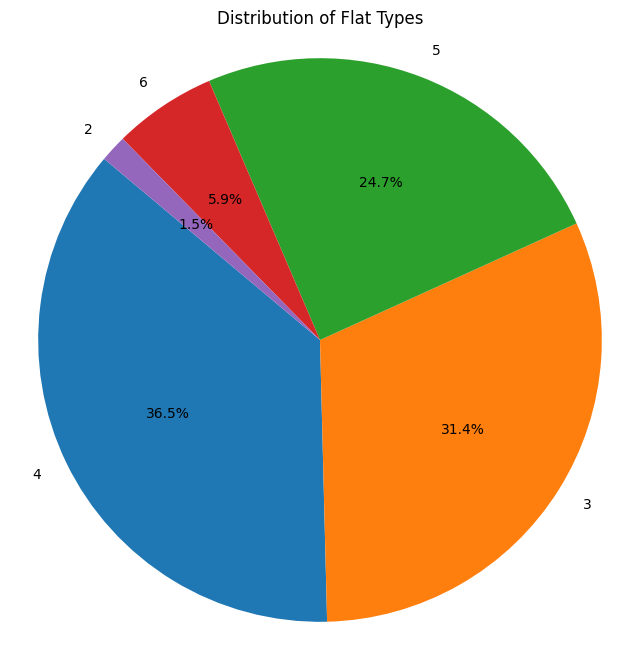

In [49]:
flat_type_counts = cleaned_data['flat_type'].value_counts()

plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(flat_type_counts, labels=flat_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Flat Types')
plt.show()

### Handling rent-approval-date

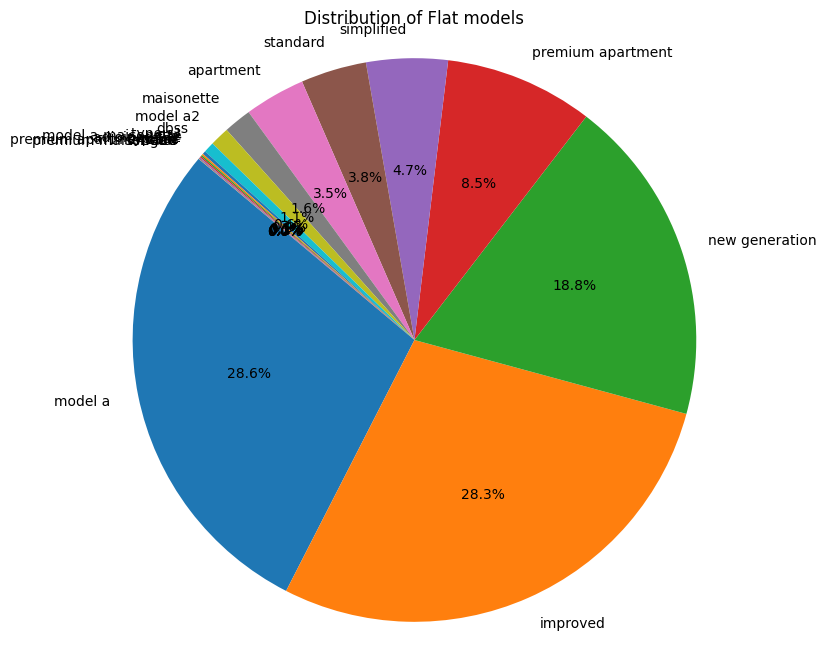

In [50]:
model_counts = cleaned_data['flat_model'].value_counts()

plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(model_counts, labels=model_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Flat models')
plt.show()